In [1]:
import numpy as np
import gnss_lib_py as glp
import matplotlib.pyplot as plt

In [2]:
# glp.make_dir("/Users/thomashuang/school/AA 272/data")
# !wget https://raw.githubusercontent.com/Stanford-NavLab/gnss_lib_py/main/data/unit_test/android/measurements/pixel6.txt --quiet -nc -O "/Users/thomashuang/school/AA 272/data/gnss_log.txt"

In [ ]:
path = './Pool/gnss_log_2024_11_06_11_13_38.txt'
fix_data = glp.AndroidRawFixes(path)

In [4]:
fix_types = np.unique(fix_data["fix_provider"]).tolist()
fix_types

['fused', 'gnss']

In [5]:
fixes = []
for provider in fix_types:
    fix_provider = fix_data.where("fix_provider",provider)
    fix_provider.rename({"lat_rx_deg":"lat_rx_" + provider + "_deg",
                         "lon_rx_deg":"lon_rx_" + provider + "_deg",
                         "alt_rx_m":"alt_rx_" + provider + "_m",
                         }, inplace=True)
    fixes.append(fix_provider)

In [6]:
fig_fix = glp.plot_map(*fixes)
fig_fix.show()

In [ ]:
raw_data = glp.AndroidRawGnss(input_path=path,
                              filter_measurements=True,
                              measurement_filters={"sv_time_uncertainty" : 500.},
                              verbose=True)

sv_time_uncertainty removed 106


In [60]:
raw_data.rows[20:]

['accumulated_delta_range_m',
 'accumulated_delta_range_sigma_m',
 'CarrierFrequencyHz',
 'CarrierCycles',
 'CarrierPhase',
 'CarrierPhaseUncertainty',
 'MultipathIndicator',
 'SnrInDb',
 'gnss_id',
 'AgcDb',
 'BasebandCn0DbHz',
 'FullInterSignalBiasNanos',
 'FullInterSignalBiasUncertaintyNanos',
 'SatelliteInterSignalBiasNanos',
 'SatelliteInterSignalBiasUncertaintyNanos',
 'CodeType',
 'ChipsetElapsedRealtimeNanos',
 'IsFullTracking',
 'signal_type',
 'gps_millis',
 'raw_pr_m',
 'raw_pr_sigma_m']

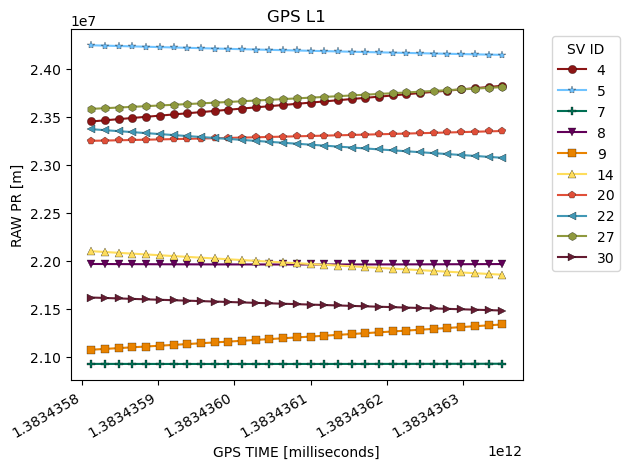

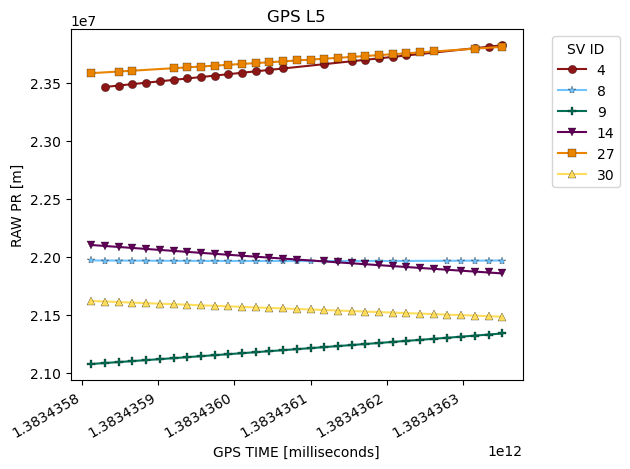

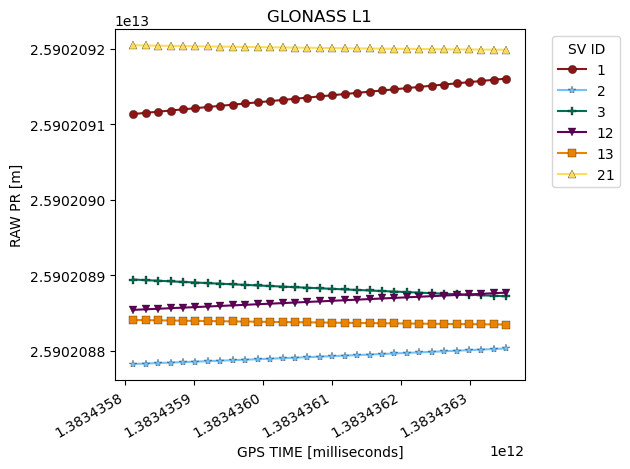

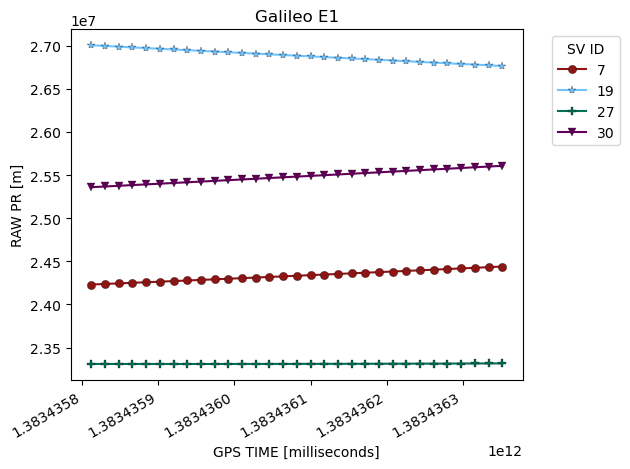

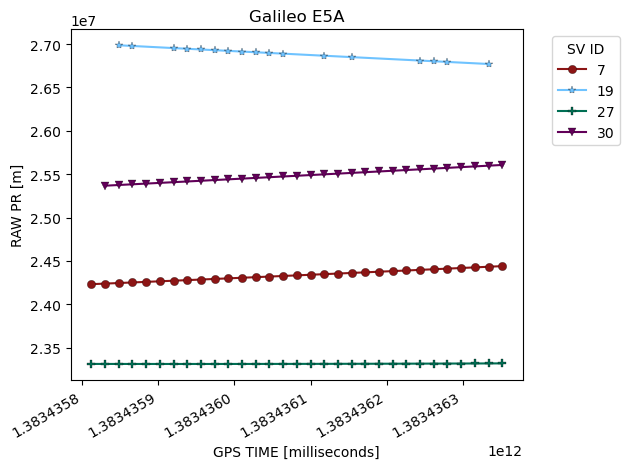

In [33]:
figs = glp.plot_metric_by_constellation(raw_data,"gps_millis","raw_pr_m")

In [7]:
# full_states = glp.add_sv_states(raw_data, source="precise", verbose=False)